# 09 워드 임베딩 Word Embedding

### 01) 워드 임베딩

1. 희소 표현 Sparse Representation

  벡터 또는 행렬 값 대부분이 0

  ex. 원-핫 벡터

2. 밀집 표현 Dense Representation

  모든 단어의 벡터 표현의 차원을 사용자가 설정한 값으로 맞춘다.

3. 워드 임베딩 Word Embedding

  단어를 밀집 벡터 형태로 표현

### 2) 워드투벡터 Word2Vec

1. 희소 표현

  단점 : 각 단어 벡터 간 유의미한 유사성 표현 불가

  대안 : 다차원 공간 벡터화 -> 분산 표현 distributed representation

  워드 임베딩 : 분산 표현 사용하여 단어 간 의미적 유사성 벡터화

2. 분산 표현 distributed representation

  비슷한 문맥에서 등장하는 단어들은 비슷한 의미 가짐을 가정

  저차원에 단어의 의미를 여러 차원에다 분산하여 표현 -> 단어 벡터 간 유의미한 유사도 계산 가능

3. CBOW (Continuous Bag of Words)

  주변 단어 입력으로 중간 단어 예측

4. Skip-gram

  중심 단어에서 주변 단어 예측

5. NNLM vs Word2Vec

  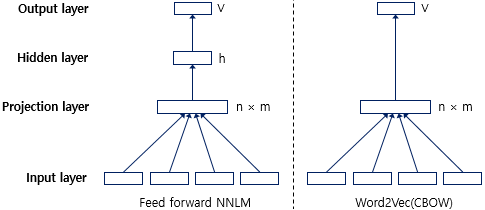

  NNLM : 다음 단어 예측하는 언어 모델이 목적

  Word2Vec : 워드 임베딩 자체가 목적, 중심 단어 예측, 단어 전후 참조


### 3) 영어/한국어 Word2Vec 실습

1. 영어 Word2Vec

- 훈련 데이터 이해

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f319cd53f90>)

- 훈련 데이터 전처리

In [ ]:
import nltk
nltk.download('punkt')

targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


- Word2Vec 훈련

  size : 임베딩 된 벡터의 차원

  window : 컨텍스트 윈도우 크기

  min_count : 단어 최소 빈도 수 제한

  workers : 학습을 위한 프로세스 수

  sg : 0은 CBOW, 1은 Skip-gram

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8807938098907471), ('guy', 0.8229900598526001), ('lady', 0.8001275062561035), ('boy', 0.7699810266494751), ('girl', 0.7552817463874817), ('soldier', 0.7426480650901794), ('gentleman', 0.7421512603759766), ('poet', 0.7280492782592773), ('kid', 0.7061430215835571), ('doctor', 0.6726807951927185)]


2. 한국어 Word2Vec (네이버 영화 리뷰)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f317facf110>)

In [ ]:
train_data = pd.read_table('ratings.txt')
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [ ]:
train_data = train_data.dropna(axis=0) # 결측 행 제거

In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업
okt = Okt()
from tqdm.notebook import tqdm # 진행 상황 시각화
tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

  0%|          | 0/199992 [00:00<?, ?it/s]

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

print(model.wv.most_similar("최민식"))

[('안성기', 0.8680018186569214), ('김명민', 0.8528748154640198), ('한석규', 0.8495897650718689), ('김수현', 0.8459886312484741), ('이민호', 0.842458188533783), ('임원희', 0.8423688411712646), ('유다인', 0.8371767401695251), ('엄정화', 0.8308849334716797), ('박중훈', 0.8288547396659851), ('엄태웅', 0.8279265761375427)]


3. 사전 훈련된 Word2Vec 임베딩 소개

In [ ]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

4. 위키피디아로 Word2Vec 학습

- 위키피디아 데이터 다운로드 및 통합

In [ ]:
pip install wikiextractor

# 형태소 분석기
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

# 위키피디아 데이터
!wget https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2

# 위키익스트랙터로 위키피디아 덤프 파싱
!python -m wikiextractor.WikiExtractor kowiki-latest-pages-articles.xml.bz2

     |████████████████████████████████| 46 kB 2.8 MB/s 


In [ ]:
%ls

GoogleNews-vectors-negative300.bin.gz  sample_data/
ratings.txt                            ted_en-20160408.xml


In [ ]:
def list_wiki(dirname):
    filepaths = []
    filenames = os.listdir(dirname)
    for filename in filenames:
        filepath = os.path.join(dirname, filename)

        if os.path.isdir(filepath):
            # 재귀 함수
            filepaths.extend(list_wiki(filepath))
        else:
            find = re.findall(r"wiki_[0-9][0-9]", filepath)
            if 0 < len(find):
                filepaths.append(filepath)
    return sorted(filepaths)
    
filepaths = list_wiki('text')

In [ ]:
with open("output_file.txt", "w") as outfile:
    for filename in filepaths:
        with open(filename) as infile:
            contents = infile.read()
            outfile.write(contents)

- 형태소 분석

In [ ]:
from tqdm import tqdm
from konlpy.tag import Mecab

mecab = Mecab()

result = []

for line in tqdm(lines):
  # 빈 문자열이 아닌 경우에만 수행
  if line:
    result.append(mecab.morphs(line))

- Word2Vec 학습

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=0)

model_result1 = model.wv.most_similar("대한민국")
print(model_result1)

### 4) 네거티브 샘플링을 이용한 Word2Vec 구현 Skip-Gram with Negative Sampling, SGNS

1. 네거티브 샘플링 Negative Sampling

  Word2Vec의 출력층에서는 소프트맥스 함수를 지난 단어 집합 크기의 벡터와 실제값인 원-핫 벡터와 오차를 구하고, 임베딩 테이블에 있는 모든 단어에 대한 임베딩 값을 업데이트 -> 집합의 수가 많이 크다면 학습하기 어려운 모델이 된다.

  네거티브 샘플링 : Word2Vec이 학습과정에서 전체 단어 집합이 아니라 일부 단어 집합에만 집중할 수 있하록 하는 방법, 하나의 중심단어에 대해 전체 단어 집합보다 훨씬 작은 단어지집합을 만들어 놓고 마지막 단계를 이진 분류 문제로 반환 (주변 단어들을 긍정 Positive, 랜덤 샘플링 된 단어들을 부정 Negative 레이블링)

2. 네거티브 샘플링 Skip-Gram (SGNS)

  기존 Skip-Gram : 중심 단어로 주변 단어 예측

  네거티브 샘플링 Skip-Gram : 중심 단어와 주변 단어가 실제로 윈도우 크기 내에 존재하는 이웃 개체인지 그 확률 예측

3. 20 뉴스그룹 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

news_df.dropna(inplace=True)

# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

vocab_size = len(word2idx) + 1 

4. 네거티브 샘플링을 통한 데이터셋 구성하기

In [ ]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

In [ ]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

5. SGNS 구현

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

6. 결과 확인

In [ ]:
import gensim

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

w2v.most_similar(positive=['soldiers'])

### 5) 글로브 Grove

1. 기존 방법론에 대한 비판

  LSA : 문서에서 각 단어의 빈도수를 카우늩한 행렬이라는 전체적인 통계정보를 입력으로 받아 차원을 축소하여 잠재된 의미를 끌어내는 방법론, 성능 떨어진다.

  Word2Vec : 실제값과 예측값에 대한 오차를 손실함수를 통해 줄여 나가며 학습하는 예측 기반 방법론, 주변 단어만 고려하기 때문에 전체적인 통계 정보 반영 불가

2. 원도우 기반 동시 등장 행렬

  행과 열을 전체 단어 집합의 단어들로 구성, i 단어의 윈도우 크기 내에서 k 단어가 등장한 횟수를 i 행 k 열애 기재한 행렬 (전치 행렬)

3. 동시 등장 확률 co-occurrence Probability

  동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i 가 등장했을 때 어떤 단어 k가 등장한트횟수를 카운트하여 계산한 조건부 확률

4. 손실 함수

  글로브의 아이디어 : 임베딩된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장확률이 되도록 만드는 것

5. 글로브 훈련

In [ ]:
pip install glove_python_binary

from glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

print(glove.most_similar("man"))

### 06) 패스트 텍스트 FastText

하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주 (내부 단어, 서브워드)

1. 내부 단어 subword 의 학습

  FastText에서는 각 단어는 글자 단위 n-gram의 구성으로 취급 (단어를 n개로 나눈 뒤 벡터화)

2. 모르는 단어 Out of Vocabulary, OOV 에 대한 대응

  내부 단어를 통해 모르는 단어에 대해서도단자른 단어와의 유사도 계산 가능

3. 단어 집합 내 빈도 수가 적었던 단어에 대한 대응

  만약 단어가 희귀 단어라 해도 그 단어의 n-gram이 다른 단어의 n-gram와 겹치는 경우라면 비교적 높은 임베딩 얻는다.

  -> 노이즈가 많은 코퍼스에 강점 가진다.

4. 한국어에서 FastText

- 음절 단위

- 자모 단위

  ㅈ ㅏ _ ㅇ ㅕ ㄴ ㅇ ㅓ

### 08) 사전 훈련된 워드 임베딩

1. 케라스 임베딩 층

- 임베딩 층은 룩업테이블이다.

  어떤 단어 -> 단어에 부여된 고유한 정수값 -> 임베딩 층 통과 -> 밀집 벡터

  케라스는 단어를 정수 인코딩까지만 진행 후 임베딩 층의 입력으로 사용

2. 사전 훈련된 워드 임베딩

GloVe 다운로드 링크 : http://nlp.stanford.edu/data/glove.6B.zip

Word2Vec 다운로드 링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM

3. 엘모 embedding from language model, ELMo

언어모델로 하는 임베딩 -> 사전 훈련된 언어모델 사용

텐서플로우 2.0에서는 사용 불가

1. ELMo

같은 표기 단어라도 문맥에 따라 다르게 워드 임베딩 할 수 있으면 자연어 처리 성능 향상 가능 : 문맥을 반영한 워드 임베딩

2. biLM 의 사전 훈련

  ELMo : 순방향, 역방향 RNN 모두 별개의 모델로 학습에 활용 -> biLM

3. biLM의 활용

  ELMo가 임베딩 벡터를 얻는 과정

  -> 각 층의 출력값을 연결

  -> 각 층의 출력값 별로 가중치 줌

  -> 각 층의 출력값을 모두 더함

  -> 벡터의 크기를 결정하는 스칼라 매개변수를 곱함

4. ELMo 표현을 사용해서 스팸 메일 분류



### 10) 임베딩 벡터의 시각화 embedding Visualization

구글 임베딩 프로젝터 https://arxiv.org/pdf/1611.05469v1.pdf

### 11) 문서 벡터를 이용한 추천 시스템

1. 데이터 로드

https://drive.google.com/file/d/15Q7DZ7xrJsI2Hji-WbkU9j1mwnODBd5A/view?usp=sharing

In [ ]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/data.csv", filename="data.csv")
df = pd.read_csv("data.csv")

df.head()

,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [ ]:
df['Desc'].isnull().sum()

0

In [ ]:
import nltk
nltk.download('stopwords')

def preprocessing(text):
  text = ''.join(i for i in text if ord(i)<128)
  text = text.lower()
  stop = set(stopwords.words('english'))
  text = [w for w in text.split() if not w in stop]
  text = ' '.join(text)
  html = re.compile('<.*?>')
  text = html.sub('',text)
  tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
  text = tokenizer.tokenize(text)
  return ' '.join(text)

df['clean'] = df['Desc'].apply(preprocessing)
df['clean'][:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    know power shifting west east north south pres...
1    following success accidental billionaires mone...
2    tap power social software networks build busin...
3    william j bernstein american financial theoris...
4    amazing book joined steve jobs many akio morit...
Name: clean, dtype: object

In [ ]:
df['clean'].replace('',np.nan,inplace = True)
df = df[df['clean'].notna()]

corpus = []
for words in df['clean']:
  corpus.append(words.split())

2. 사전 훈련된 워드 임베딩 사용

In [ ]:
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")

word2vec_model = Word2Vec(size = 300, window=5, min_count = 2, workers = -1)
word2vec_model.build_vocab(corpus)
word2vec_model.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz', lockf=1.0, binary=True)
word2vec_model.train(corpus, total_examples = word2vec_model.corpus_count, epochs = 15)


(0, 0)

3. 단어 벡터의 평균 구하기

In [ ]:
def get_document_vectors(document_list):
    document_embedding_list = []

    # 각 문서에 대해서
    for line in document_list:
        doc2vec = None
        count = 0
        for word in line.split():
            if word in word2vec_model.wv.vocab:
                count += 1
                # 해당 문서에 있는 모든 단어들의 벡터값을 더한다.
                if doc2vec is None:
                    doc2vec = word2vec_model[word]
                else:
                    doc2vec = doc2vec + word2vec_model[word]

        if doc2vec is not None:
            # 단어 벡터를 모두 더한 벡터의 값을 문서 길이로 나눠준다.
            doc2vec = doc2vec / count
            document_embedding_list.append(doc2vec)

    # 각 문서에 대한 문서 벡터 리스트를 리턴
    return document_embedding_list

document_embedding_list = get_document_vectors(df['clean'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


4. 추천 시스템 구현

In [ ]:
# 각 문서 벡터 간의 코사인 유사도를 구함
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)

# 줄거리 유사한 문서
def recommendations(title):
  books = df[['title','image_link']]
  indices = pd.Series(df.index,index = df['title']).drop_duplicates()
  idx = indices[title]

  sim_scores = list(enumerate(cosine_similarities[idx]))
  sim_scores = sorted(sim_scores,key = lambda x: x[1],reverse= True)
  sim_scores = sim_scores[1:6]

  book_indices = [i[0] for i in sim_scores]

  recommend = books.iloc[book_indices].reset_index(drop=True)
  
  print(recommend['title'])

recommendations('The Murder of Roger Ackroyd')

0              Night Film
1    The Cuckoo's Calling
2            Mystic River
3          Case Histories
4            Mr. Mercedes
Name: title, dtype: object


### 12) 문서 임베딩 : 워드 임베딩의평균

특정 문장 내의 단어들의 임베딩 벡터들의 평균이 그 문장의 벡터가 될 수 있다.

임베딩이 잘 된 상황에서는 단어 벡터들의 평균만으로 텍스트 분류를 수행할 수 있다.

Embedding() 다음에 GlobalAveragePooling1D()을 추가하면 해당 문장의 모든 단어 벡터들의 평균 벡터를 구한다.

### 13) Doc2Vec로 공시 사업 보고서 유사도 계산

Doc2Vec : Word2Vec 변형

https://arxiv.org/abs/1405.4053

1. 공시 사업 보고서 로드 및 전처리

In [ ]:
# dart.csv 파일 다운로드
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT" -O dart.csv && rm -rf /tmp/cookies.txt

# 형태소 분석기 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

import pandas as pd
from konlpy.tag import Mecab
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm

df = pd.read_csv('/content/dart.csv',sep=',')
df = df.dropna()

mecab = Mecab()
tagged_corpus_list = []

for index, row in tqdm(df.iterrows(), total=len(df)):
  text = row['business']
  tag = row['name']
  tagged_corpus_list.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

2. doc2vec 학습 및 테스트


In [ ]:
# 1시간 걸림

from gensim.models import doc2vec
model = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model.build_vocab(tagged_corpus_list)

# Doc2Vec 학습
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=50)

# 모델 저장
model.save('dart.doc2vec')

In [ ]:
print(model.docvecs.most_similar('동화약품'))